In [1]:
using constants
using types
using Optim
using PyPlot
using data
include("DOSfunctions.jl")
include("userfunctions.jl")
include("propertyfuncs.jl")

electronicthermalPropsiso (generic function with 1 method)

In [2]:
Eoff=1.0
Ts=collect(300.0:10.0:800.0)
######################################################################################
##for Liu x=0.6 best fit x=0.635 N=-1.45e20
######################################################################################
numofn=[-1.15e20,-1.42e20,-1.52e20,-1.75e20]#-9.5e19,-1.75e20,-3.0e19,-0.9e20]#Sample 1 -3.0e19, Sample 2 -1.25e20,
#Sample 3 -1.75e20, Sample Sb 0.75% -1.03e20, #
xs=[0.635,0.635,0.635,0.635]#collect(0.0:0.01:1.0)
Es=collect(0.0:0.1:3.0)

var0=[Ts[1],xs[1]]

EX3(var)=Eoff#+Egx3(var[1],var[2])
EX1(var)=Ec0(var[2])+EX3(var)
ELH(var)=Eoff-Egx3(var[1],var[2])
EHH(var)=Eoff-Egx3(var[1],var[2])

effMassX1(var)=X1effMass(var[1])*me
effMassX3(var)=0.38*me
effMassLH(var)=-1.0*me
effMassHH(var)=-1.5*me

alphaX1=EX1(var0)
alphaX3=EX3(var0)

bandX3=parBandTx(effMassX3(var0),alphaX3,EX3(var0),[EX3],[effMassX3],var0)
bandX1=parBandTx(effMassX1(var0),alphaX1,EX1(var0),[EX1],[effMassX1],var0)
bandHH=parBandTx(effMassHH(var0),0.0,EHH(var0),[EHH],[effMassHH],var0)
bandLH=parBandTx(effMassLH(var0),0.0,ELH(var0),[ELH],[effMassLH],var0)
bndstTx=BandStrucTx([bandLH,bandHH,bandX1,bandX1,bandX1,bandX3,bandX3,bandX3],var0)#

NII=1e12*1e6
vartau0=[bandX3.effMass,Ts[1],1.0,xs[1],1.5,bandX3,NII,bndstTx]
#var array: var[1]: effMass , var[2]:T, var[3]:E, var[4]:x, var[5]:Ef, 
#var[6]:band, var[7]:NII var[8]:bndst
tauAC(var)=tauAC_func(Cl(var[4]),acPhDa(var[4]),var[2],var[1],var[3],var[6])
tauPOP(var)=tauPOP_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1]
,var[3],tauPOPIIint(var[5],var[2],var[4],var[6]),var[7],opPhE(var[4]),var[8])
tauPOP2(var)=tauPOP2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[1],
var[3],opPhE(var[4]))
tauII2(var)=tauII2_func(epsilon0_x(var[4]),epsilonhf_x(var[4]),var[6],var[5],var[2],var[7],var[1],var[3],var[8])

tauTOTTx=tau_electron_B([tauAC,tauII2,tauPOP2],vartau0)#
tauACs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauPOPs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauIIs=Array{Float64}(length(Es),length(Ts),length(numofn))
tauTOTs=Array{Float64}(length(Es),length(Ts),length(numofn))

numofnsout=Array{Float64}(length(Ts),length(numofn))
numofnsoutn=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))
numofnsoutp=Array{Float64}(length(Ts),length(numofn),length(bndstTx.bands))

xmax=3.0
sigmas=Array{Float64}(length(Ts),length(numofn))
seebecks=Array{Float64}(length(Ts),length(numofn))
Efs=Array{Float64}(length(Ts),length(numofn))
#@time (sigmas,seebecks)=sigmaArray(bndstTx,Ts,xs,numofn,tauTOTTx,xmax)

51×4 Array{Float64,2}:
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 ⋮                                                 
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6.8998e-310
 6.8998e-310  6.8998e-310  6.8998e-310  6

In [3]:
@time (Efs,sigmas,seebecks,kes,kees,kehs,kbis)=electronicPropsiso(bndstTx,xs,Ts,numofn,tauTOTTx,xmax)

254.817072 seconds (1.11 G allocations: 295.193 GB, 36.61% gc time)


(
[1.0608 4.13344e-316 4.09571e-316 6.60171e-320; 1.05962 0.0 0.0 2.37152e-322; … ; 0.971819 7.90505e-322 4.16729e-316 4.06846e-316; 0.970029 4.74303e-322 1.0878e243 0.0]

[4.1747e-316 1.07052 2.37152e-322 4.32786e-315; 4.17482e-316 1.06944 3.16202e-322 0.0; … ; 4.14416e-317 0.986294 4.09115e-316 0.0; 0.0 0.984415 1.0878e243 4.22965e-316]

[NaN 4.17161e-316 1.07381 4.14429e-317; 4.79244e-322 4.74303e-322 1.07276 0.0; … ; 1.63042e-322 4.09474e-316 0.991171 0.0; 4.20585e-316 4.0967e-316 0.989276 0.0]

[4.17207e-316 4.24422e-314 0.0 1.08088; 1.11165e-321 0.0 0.0 1.0799; … ; 4.14428e-317 2.122e-314 4.79244e-322 1.00157; 0.0 0.0 4.174e-316 0.999658],

[1.34889e5 2.04014e-316 6.95293e-310 2.04014e-316; 1.30451e5 0.0 6.08689e-320 0.0; … ; 41195.3 0.0 8.80623e-320 9.88131e-324; 40783.7 6.31416e-320 8.80623e-320 5.83492e-321]

[6.95293e-310 1.59731e5 6.95293e-310 2.04014e-316; 5.93669e-320 1.54857e5 8.80623e-320 4.94066e-323; … ; 6.50586e-320 48451.2 5.77069e-320 4.94066e-323; 0.0 47775.2 0.0 2

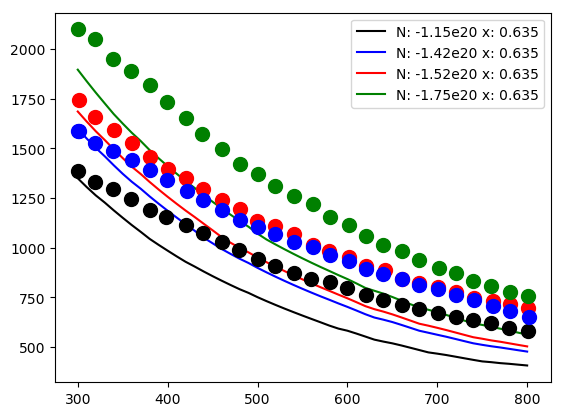

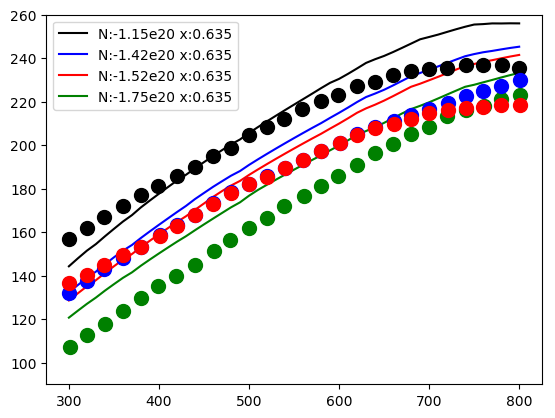

PyObject <matplotlib.legend.Legend object at 0x7f0370203160>

In [4]:
colors=["k","b","r","g","m","y","c"]
plots=Array{Any}(length(numofn)*length(xs))
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)                
        plot(Ts,sigmas[:,p,q]/100,linestyle="-",color=colors[mod(k,length(colors))]
        ,label=string("N: $(numofn[p]) x: $(xs[q])"))
        k+=1
        #push!(plots,p)       
   # end
end
plot(LMg2SiSn04TE,LMg2SiSn04E, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn07TE,LMg2SiSn07E, linestyle="None",marker=".",markersize=20,color="r")
plot(LMg2SiSn06TE,LMg2SiSn06E, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TE,LMg2SiSn08E, linestyle="None",marker=".",markersize=20,color="g")
#ylim(400,2200)
legend()
figure()
k=1
for p in 1:1:length(numofn)
    q=p
    #for q in 1:1:length(xs)
        plot(Ts,-1e6*seebecks[:,p,q],color=colors[mod(k,length(colors))]
        ,label=string("N:$(numofn[p]) x:$(xs[q])")) 
        k+=1
    #end
end
plot(LMg2SiSn04TS,LMg2SiSn04S, linestyle="None",marker=".",markersize=20,color="g")
plot(LMg2SiSn07TS,LMg2SiSn07S, linestyle="None",marker=".",markersize=20,color="k")
plot(LMg2SiSn06TS,LMg2SiSn06S, linestyle="None",marker=".",markersize=20,color="b")
plot(LMg2SiSn08TS,LMg2SiSn08S, linestyle="None",marker=".",markersize=20,color="r")
ylim(90,260)
legend(loc="upper left")